In [1]:
import numpy as np
from ge.classify import read_node_label,Classifier
from ge import Struc2Vec
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")

In [7]:
def evaluate_embeddings(embeddings):
    X, Y = read_node_label('../data/flight/labels-brazil-airports.txt',skip_head=True)
    tr_frac = 0.8
    print("Training classifier using {:.2f}% nodes...".format(
        tr_frac * 100))
    clf = Classifier(embeddings=embeddings, clf=LogisticRegression())
    clf.split_train_evaluate(X, Y, tr_frac)


def plot_embeddings(embeddings,):
    X, Y = read_node_label('../data/flight/labels-brazil-airports.txt',skip_head=True)
    emb_list = []
    for k in X:
        emb_list.append(embeddings[k])
    emb_list = np.array(emb_list)
    model = TSNE(n_components=2)
    node_pos = model.fit_transform(emb_list)
    color_idx = {}
    for i in range(len(X)):
        color_idx.setdefault(Y[i][0], [])
        color_idx[Y[i][0]].append(i)
    for c, idx in color_idx.items():
        plt.scatter(node_pos[idx, 0], node_pos[idx, 1], label=c)  # c=node_colors)
    plt.legend()
    plt.show()

In [4]:
G = nx.read_edgelist('../data/flight/brazil-airports.edgelist', create_using=nx.DiGraph(), nodetype=None,
                        data=[('weight', int)])

model = Struc2Vec(G, 10, 80, workers=1, verbose=40, )
model.train()
embeddings = model.get_embeddings()

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.2s


Learning representation...
Learning representation done!


In [8]:
evaluate_embeddings(embeddings)

Training classifier using 80.00% nodes...
-------------------
{'micro': 0.7857142857142857, 'macro': 0.8041666666666667, 'samples': 0.7857142857142857, 'weighted': 0.7761904761904762, 'acc': 0.7857142857142857}


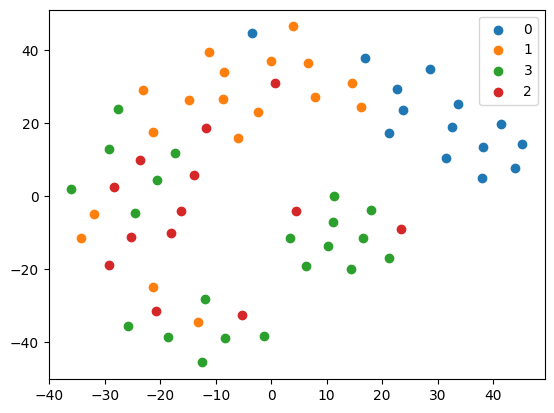

In [9]:
plot_embeddings(embeddings)